<a href="https://colab.research.google.com/github/daldalman0511/java-samples/blob/main/gpt4o_ocr_invoice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openai

In [ ]:
import os
import base64
import json
from PIL import Image

from google.colab import userdata

from openai import OpenAI

In [ ]:
# API_KEYの取得
os.environ["OPENAI_API_KEY"] = userdata.get('MY_OPENAI_API_KEY')

## 適当にファイルをダウンロード

`example.jpg` というファイル名でダウンロードする

In [ ]:
!wget -O example.jpg https://cdn-ak.f.st-hatena.com/images/fotolife/n/nogawanogawa/20240608/20240608102526.jpg

--2024-06-08 06:02:37--  https://cdn-ak.f.st-hatena.com/images/fotolife/n/nogawanogawa/20240608/20240608102526.jpg
Resolving cdn-ak.f.st-hatena.com (cdn-ak.f.st-hatena.com)... 23.193.25.47
Connecting to cdn-ak.f.st-hatena.com (cdn-ak.f.st-hatena.com)|23.193.25.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52970 (52K) [image/jpeg]
Saving to: ‘example.jpg’

example.jpg         100%[===================>]  51.73K  --.-KB/s    in 0.007s  

2024-06-08 06:02:37 (7.02 MB/s) - ‘example.jpg’ saved [52970/52970]



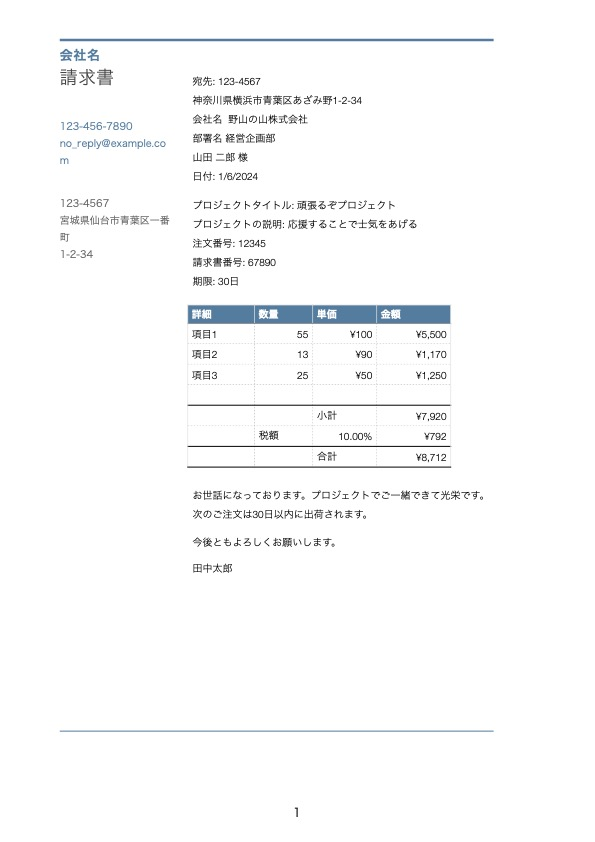

In [ ]:
img = Image.open('/content/example.jpg')

img

In [ ]:
# https://qiita.com/nabata/items/32d8fac31549491f56eb

from openai import OpenAI
import os
import base64

client = OpenAI()

image_path = "/content/example.jpg"

json_schema = {
  "$schema": "http://json-schema.org/draft-07/schema#",
  "type": "object",
  "properties": {
    "address": {
      "type": "string",
    },
    "name": {
      "type": "string",
    },
    "post_code": {
      "type": "string",
    },
  },
  "required": ["address", "name", "post_code"]
}

with open(image_path, "rb") as image_file:  # 画像ファイルまでのパス
    base64_image = base64.b64encode(image_file.read()).decode('utf-8')

completion = client.chat.completions.create(
    model="gpt-4o",  # モデルの指定
    messages=[
        {"role": "system", "content": "You are an excellent secretary who responds in Japanese."},
        {"role": "user",
         "content": [
             {"type": "text", "text": """\
## 命令
この画像に表示されている内容について回答してください。
請求先の住所(address), 氏名(name), 郵便番号(post_code)を教えて下さい。

## Output
"""},
             {
                 "type": "image_url",
                 "image_url": {
                     "url": f"data:image/png;base64,{base64_image}"
                 },
             },
         ],
         }
    ],
    functions=[
        {"name": "extract_text", "parameters": json_schema}
    ],
    function_call={"name": "extract_text"},
)

json.loads(completion.choices[0].message.function_call.arguments)

{'address': '神奈川県横浜市青葉区あざみ野1-2-34', 'name': '山田一郎様', 'post_code': '123-4567'}